##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 104, done.
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (104/104), 19.32 MiB | 32.64 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/TestImages/HRTEM
Au.tif	TestImages


*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/HRTEM/
!ls

/content/TestImages/HRTEM
Au.tif	TestImages


# **Questão:**

\

A imagem de teste Au.tif é uma imagem de microscopia eletrônica de transmissão de alta resolução. Na parte escura, próximo ao centro da imagem, podem ser observados diferentes orientações cristalográficas, cada uma contribuindo com diferentes componentes no domínio da frequência. A partir de uma análise de Fourier e filtragem no domínio da frequência usando filtros Gaussianos, separe tais orientações cristalográficas no maior número de grupos que você for capaz.

O primeiro grupo já está segmentado aparecendo na cor azul na figura 'Enhanced'.

\

Explique e analise os resultados obtidos.

\

Note que o filtro presente no programa original é um filtro ideal



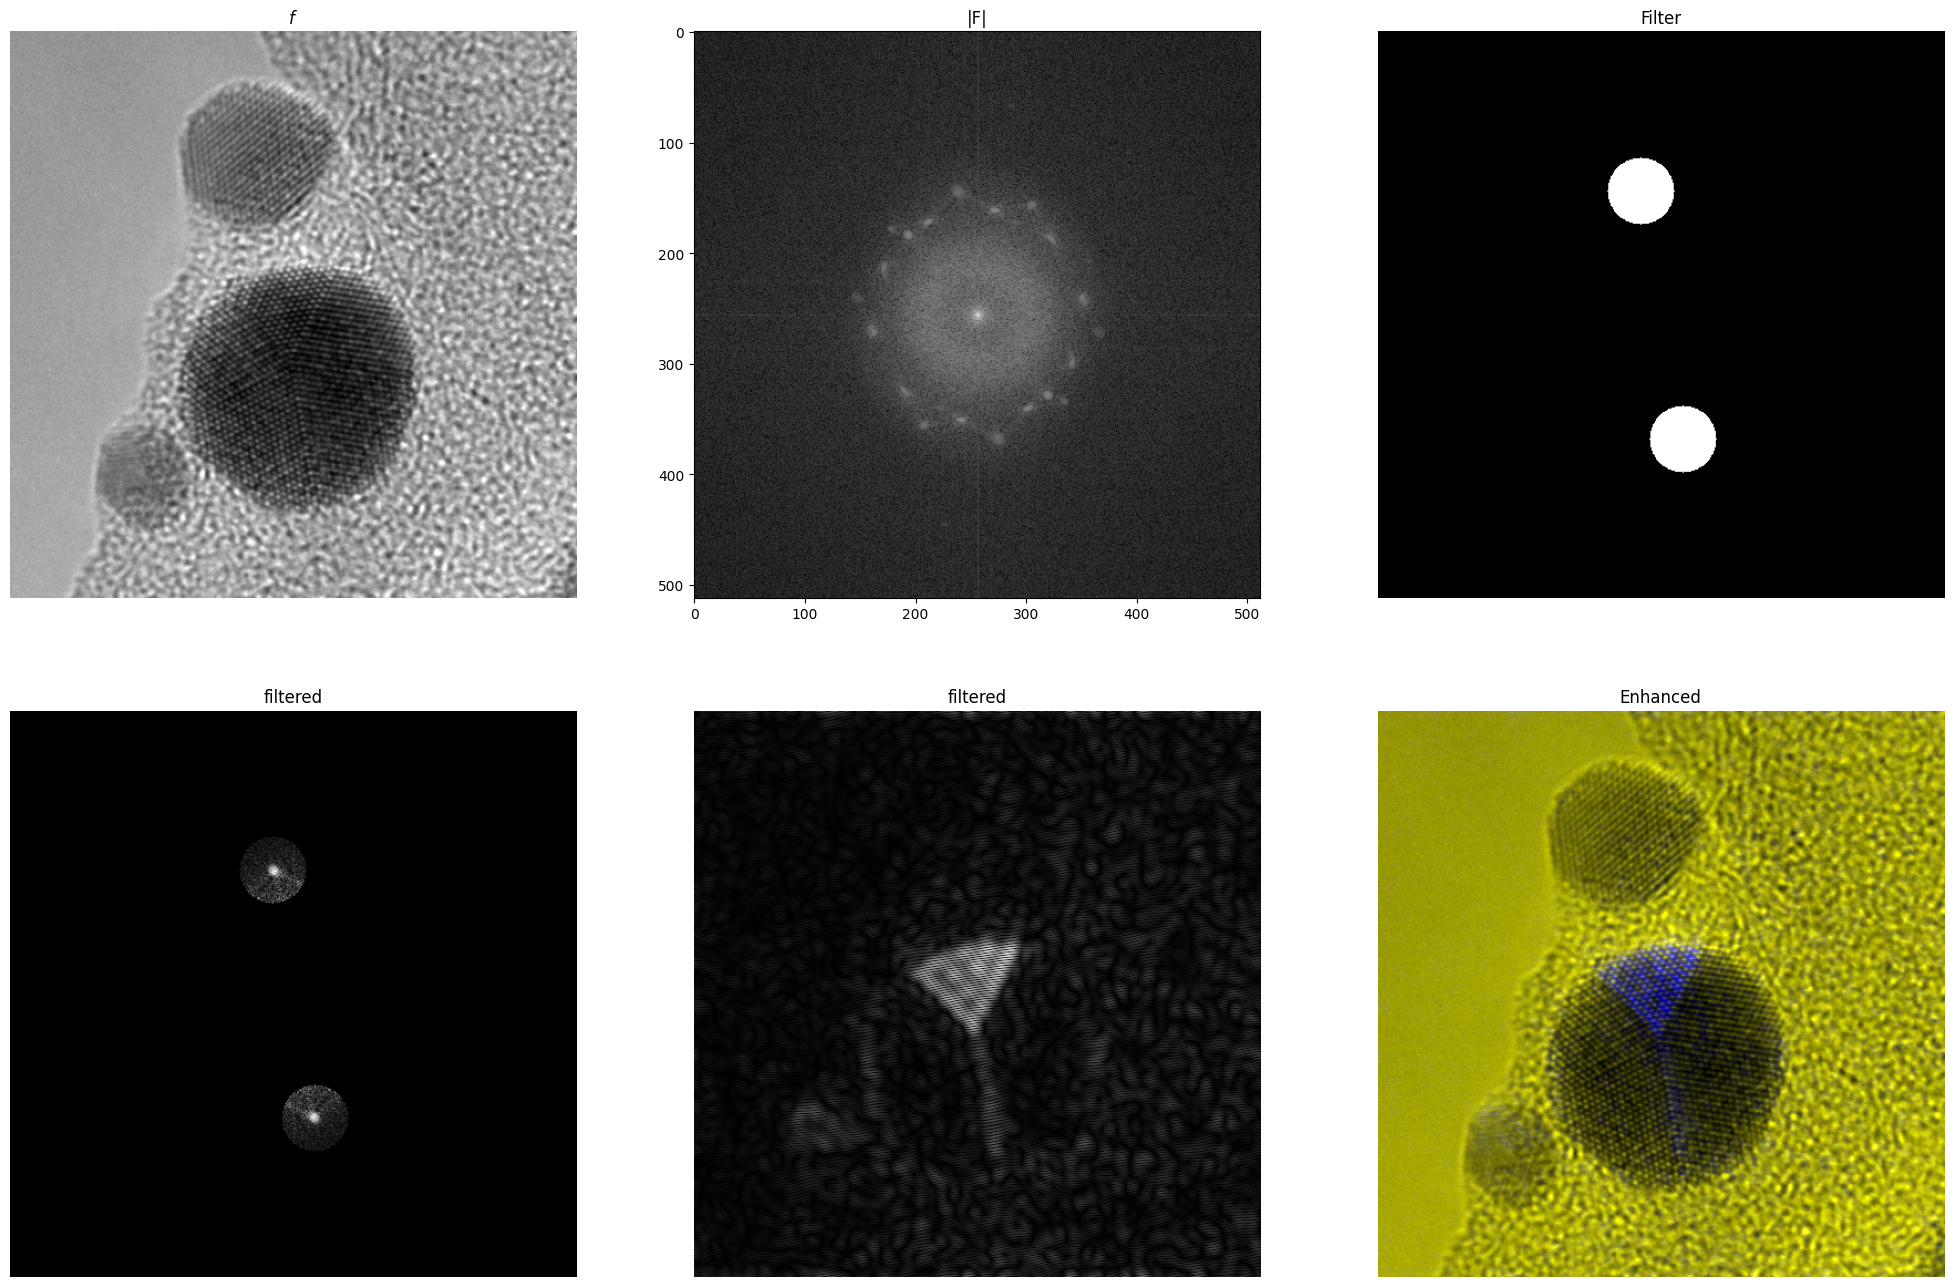

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def ImageFilter(fft_img,mask):
    fshift = fft_img*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return fshift,img_back


f = cv2.imread('Au.tif',0)

plt.figure(figsize = (25,25))

plt.subplot(3,3,1)
plt.title('$f$')
plt.axis('off')
plt.imshow(f,cmap = 'gray')

dft_f = cv2.dft(np.float32(f),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_f_shift = np.fft.fftshift(dft_f)
magnitude = np.sqrt(dft_f_shift[:,:,0]**2+dft_f_shift[:,:,1]**2)

plt.subplot(3,3,2)
plt.title('|F|')
plt.axis('on')
plt.imshow(255*np.log(magnitude/255+1), cmap = 'gray')

# filter g
g = (np.float32(([[[ 900>=(x - 144)**2 + (y - 237)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 368)**2 + (y - 275)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))

plt.subplot(3,3,3)
plt.title('Filter')
plt.axis('off')
plt.imshow(g[:,:,0], cmap = 'gray')

plt.subplot(3,3,4)
plt.title('filtered')
plt.axis('off')
plt.imshow( magnitude * g[:,:,0], cmap = 'gray')


f_dft_filtered_shift, img_filtered = ImageFilter(dft_f_shift, g)

plt.subplot(3,3,5)
plt.title('filtered')
plt.axis('off')
plt.imshow(img_filtered, cmap = 'gray')

plt.subplot(3,3,6)
plt.title('Enhanced')
plt.axis('off')

img_filtered = np.uint8(255*img_filtered/np.amax(img_filtered))
RGB = np.stack((f,f, img_filtered), axis=2)
plt.imshow(RGB)


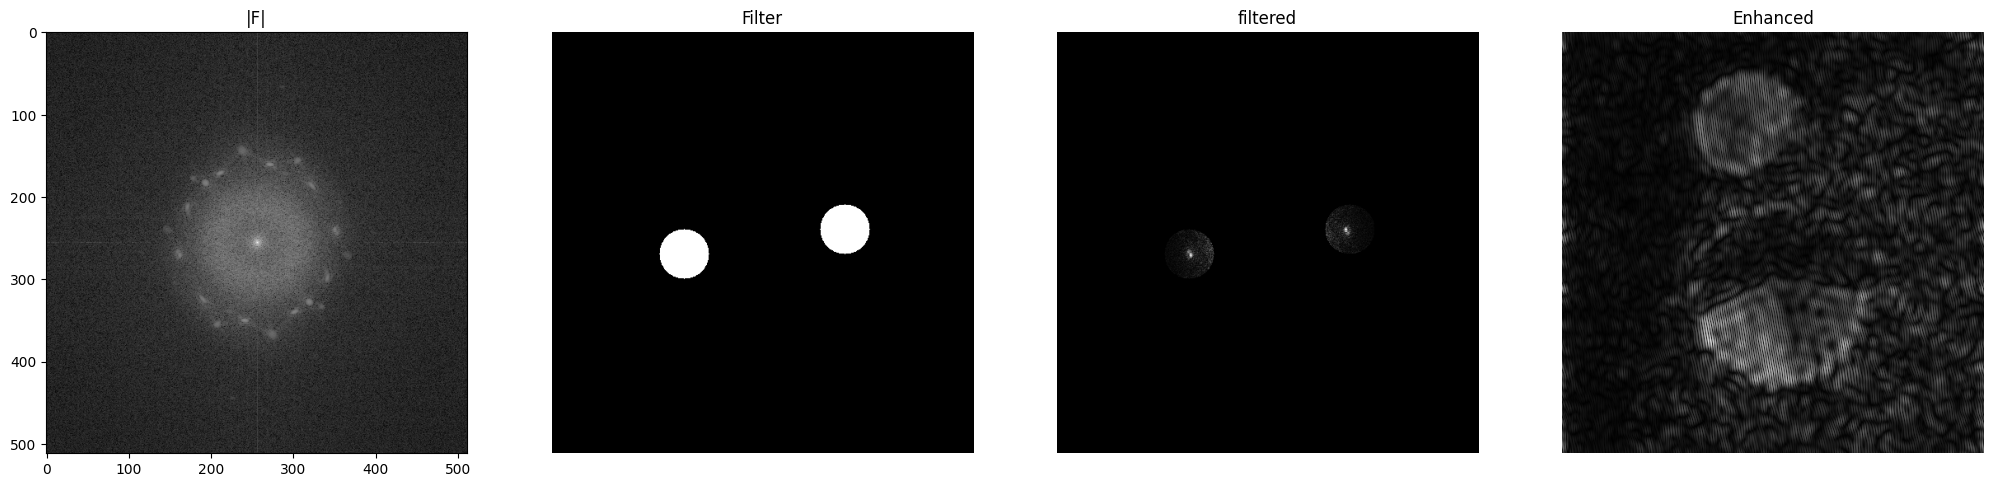

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(1,4,1)
plt.title('|F|')
plt.axis('on')
plt.imshow(255*np.log(magnitude/255+1), cmap = 'gray')

# filter g2
g2 = (np.float32(([[[ 900>=(x - 270)**2 + (y - 160)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 240)**2 + (y - 355)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))

plt.subplot(1,4,2)
plt.title('Filter')
plt.axis('off')
plt.imshow(g2[:,:,0], cmap = 'gray')

plt.subplot(1,4,3)
plt.title('filtered')
plt.axis('off')
plt.imshow( magnitude * g2[:,:,0], cmap = 'gray')

f_dft_filtered_shift, img_filtered2 = ImageFilter(dft_f_shift, g2)

plt.subplot(1,4,4)
plt.title('Enhanced')
plt.axis('off')

img_filtered2 = np.uint8(255*img_filtered2/np.amax(img_filtered2))
RGB = np.stack((f,f, img_filtered2), axis=2)
plt.imshow(img_filtered2, cmap = 'gray')

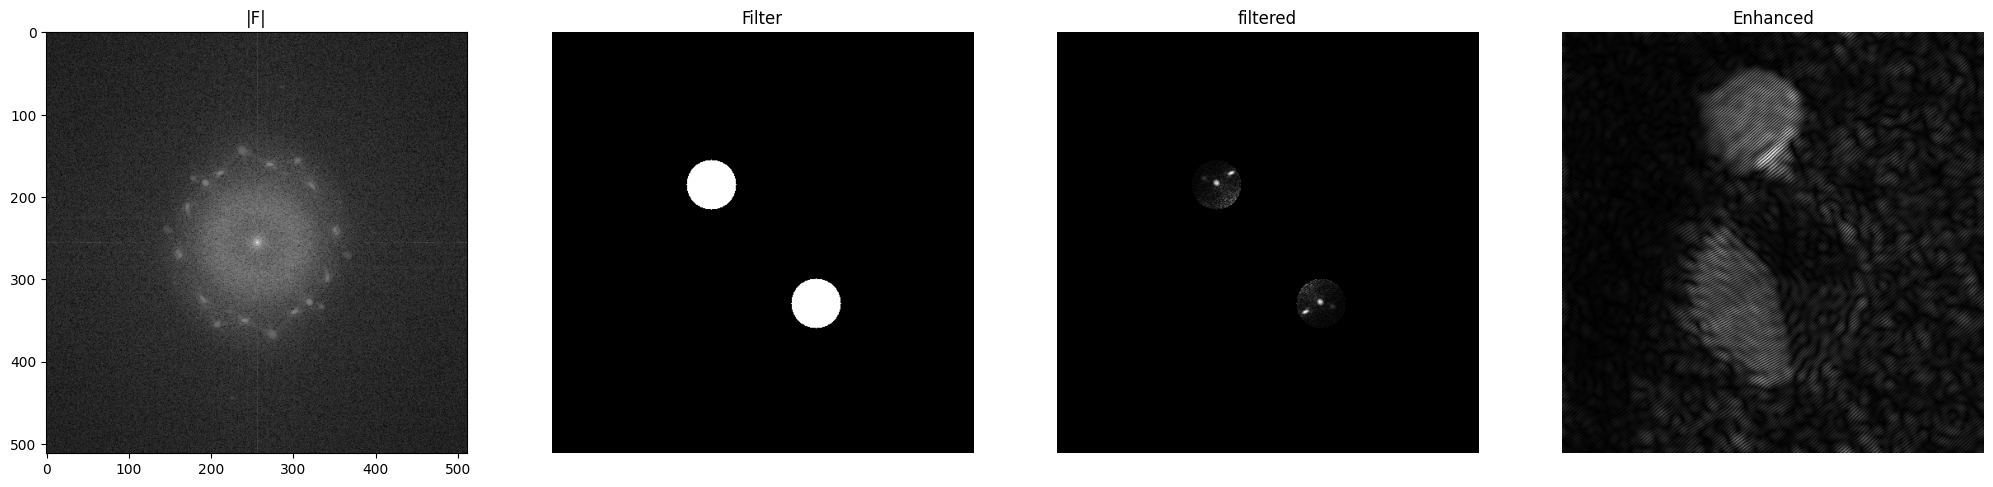

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(1,4,1)
plt.title('|F|')
plt.axis('on')
plt.imshow(255*np.log(magnitude/255+1), cmap = 'gray')

# filter g3
g3 = (np.float32(([[[ 900>=(x - 186)**2 + (y - 193)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 330)**2 + (y - 320)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))

plt.subplot(1,4,2)
plt.title('Filter')
plt.axis('off')
plt.imshow(g3[:,:,0], cmap = 'gray')

plt.subplot(1,4,3)
plt.title('filtered')
plt.axis('off')
plt.imshow( magnitude * g3[:,:,0], cmap = 'gray')

f_dft_filtered_shift, img_filtered3 = ImageFilter(dft_f_shift, g3)

plt.subplot(1,4,4)
plt.title('Enhanced')
plt.axis('off')

img_filtered3 = np.uint8(255*img_filtered3/np.amax(img_filtered3))
RGB = np.stack((f,f, img_filtered3), axis=2)
plt.imshow(img_filtered3, cmap = 'gray')

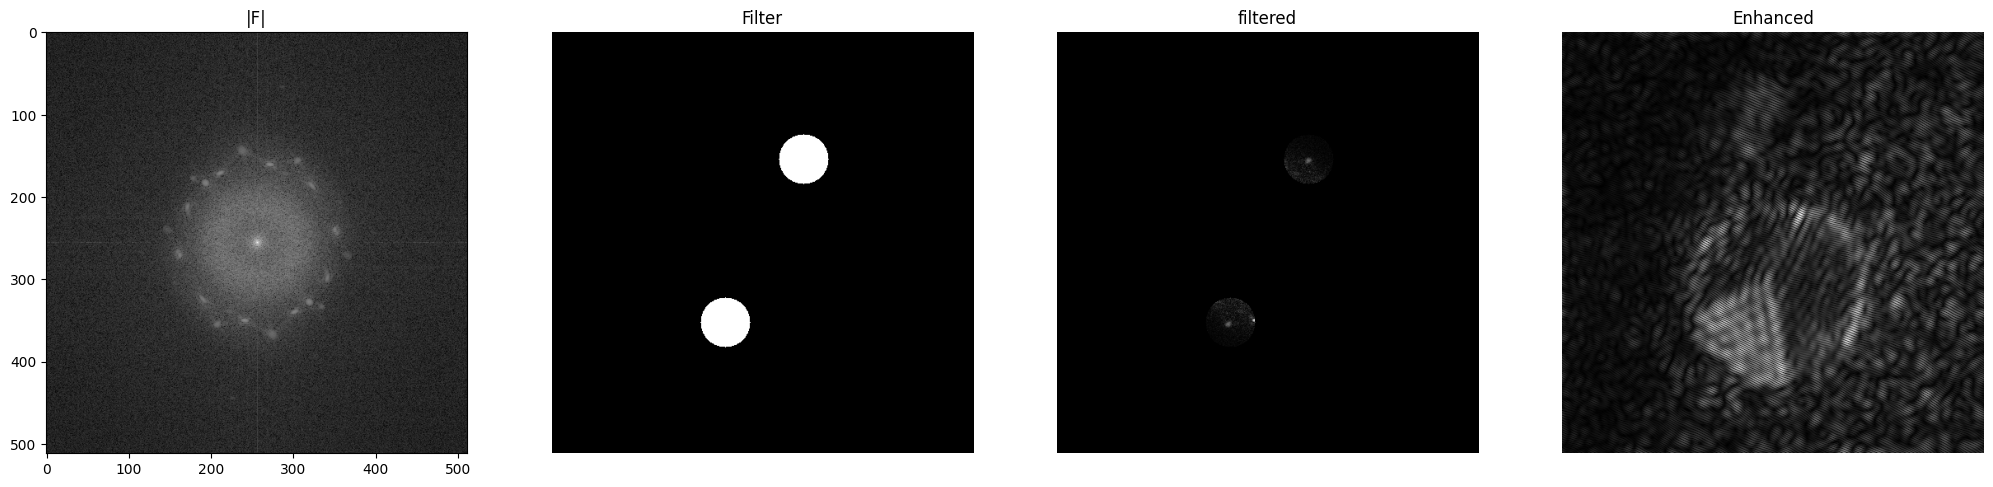

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(1,4,1)
plt.title('|F|')
plt.axis('on')
plt.imshow(255*np.log(magnitude/255+1), cmap = 'gray')

# filter g4
g4 = (np.float32(([[[ 900>=(x - 155)**2 + (y - 305)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 353)**2 + (y - 210)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))

plt.subplot(1,4,2)
plt.title('Filter')
plt.axis('off')
plt.imshow(g4[:,:,0], cmap = 'gray')

plt.subplot(1,4,3)
plt.title('filtered')
plt.axis('off')
plt.imshow( magnitude * g4[:,:,0], cmap = 'gray')

f_dft_filtered_shift, img_filtered4 = ImageFilter(dft_f_shift, g4)

plt.subplot(1,4,4)
plt.title('Enhanced')
plt.axis('off')

img_filtered4 = np.uint8(255*img_filtered4/np.amax(img_filtered4))
RGB = np.stack((f,f, img_filtered4), axis=2)
plt.imshow(img_filtered4, cmap = 'gray')

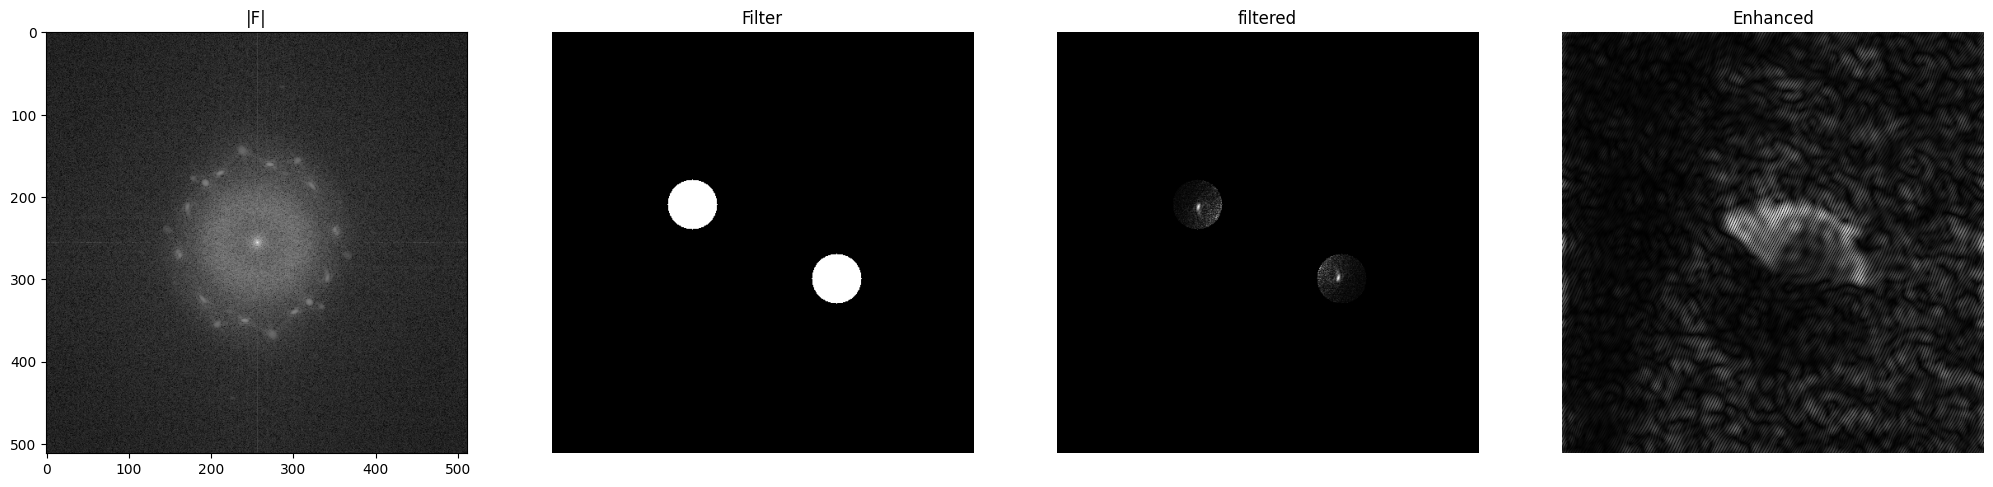

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(1,4,1)
plt.title('|F|')
plt.axis('on')
plt.imshow(255*np.log(magnitude/255+1), cmap = 'gray')

# filter g5
g5 = (np.float32(([[[ 900>=(x - 210)**2 + (y - 170)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 300)**2 + (y - 345)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))

plt.subplot(1,4,2)
plt.title('Filter')
plt.axis('off')
plt.imshow(g5[:,:,0], cmap = 'gray')

plt.subplot(1,4,3)
plt.title('filtered')
plt.axis('off')
plt.imshow( magnitude * g5[:,:,0], cmap = 'gray')

f_dft_filtered_shift, img_filtered5 = ImageFilter(dft_f_shift, g5)

plt.subplot(1,4,4)
plt.title('Enhanced')
plt.axis('off')

img_filtered5 = np.uint8(255*img_filtered5/np.amax(img_filtered5))
RGB = np.stack((f,f, img_filtered5), axis=2)
plt.imshow(img_filtered5, cmap = 'gray')

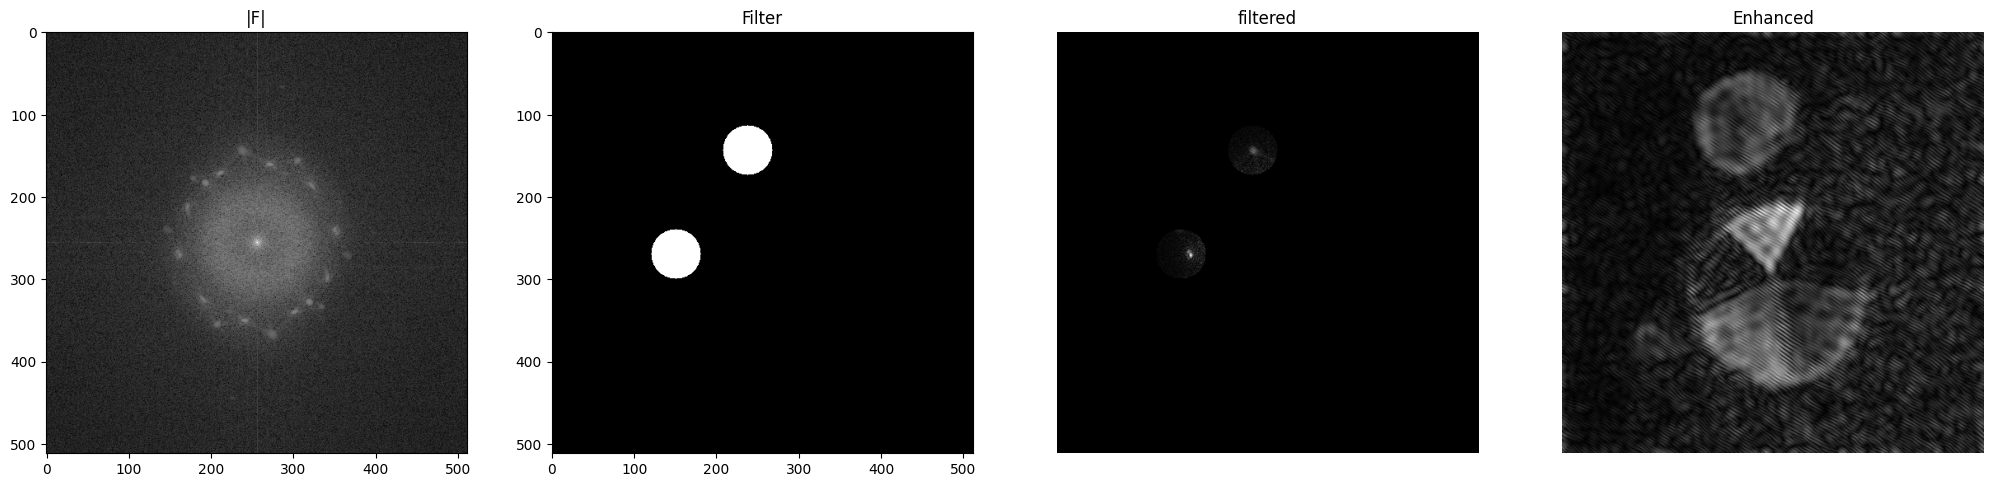

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(1,4,1)
plt.title('|F|')
plt.axis('on')
plt.imshow(255*np.log(magnitude/255+1), cmap = 'gray')

# filter g6
g6 = (np.float32(([[[ 900>=(x - 144)**2 + (y - 237)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 270)**2 + (y - 150)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))

plt.subplot(1,4,2)
plt.title('Filter')
plt.axis('on')
plt.imshow(g6[:,:,0], cmap = 'gray')

plt.subplot(1,4,3)
plt.title('filtered')
plt.axis('off')
plt.imshow( magnitude * g6[:,:,0], cmap = 'gray')

f_dft_filtered_shift, img_filtered6 = ImageFilter(dft_f_shift, g6)

plt.subplot(1,4,4)
plt.title('Enhanced')
plt.axis('off')

img_filtered6 = np.uint8(255*img_filtered6/np.amax(img_filtered6))
RGB = np.stack((f,f, img_filtered6), axis=2)
plt.imshow(img_filtered6, cmap = 'gray')

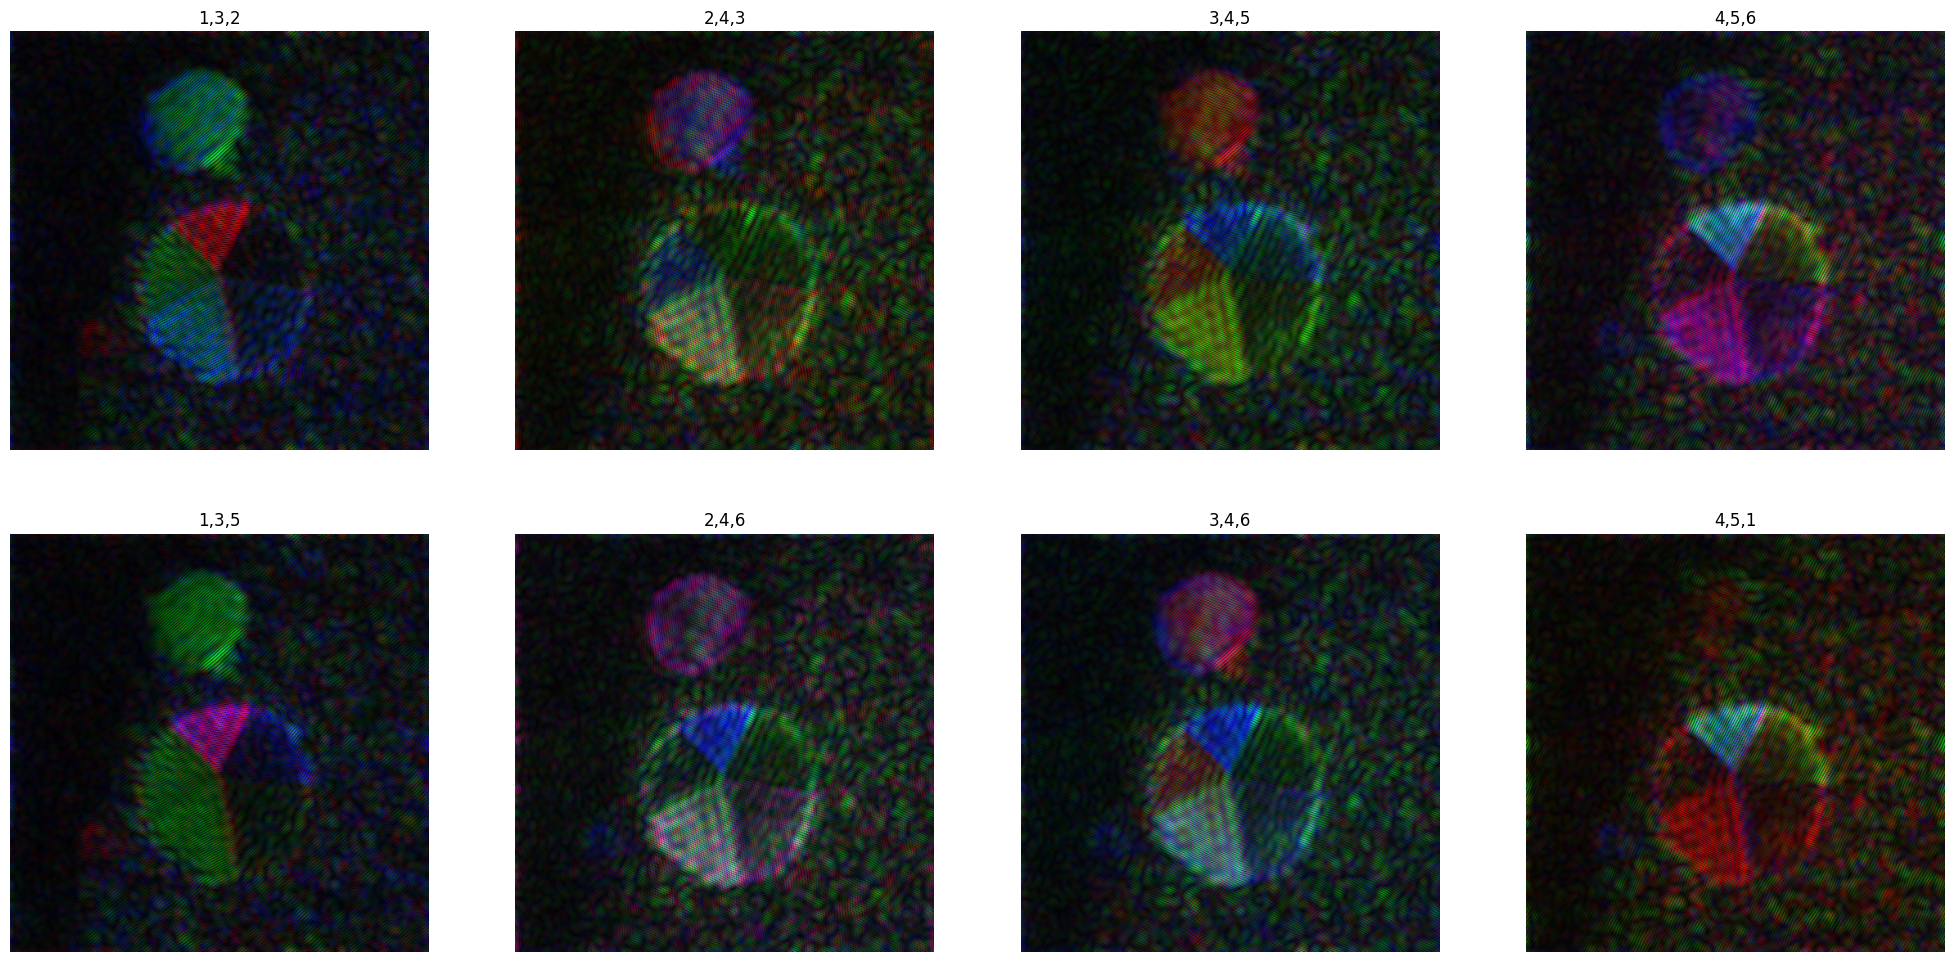

In [ ]:
i,j = 4,4
plt.figure(figsize = (25,25))

plt.subplot(i,j,1)
plt.title('1,3,2')
plt.axis('off')
RGB = np.stack((img_filtered,img_filtered3, img_filtered2), axis=2)
plt.imshow(RGB)

plt.subplot(i,j,2)
plt.title('2,4,3')
plt.axis('off')
RGB = np.stack((img_filtered2,img_filtered4, img_filtered3), axis=2)
plt.imshow(RGB)

plt.subplot(i,j,3)
plt.title('3,4,5')
plt.axis('off')
RGB = np.stack((img_filtered3,img_filtered4, img_filtered5), axis=2)
plt.imshow(RGB)

plt.subplot(i,j,4)
plt.title('4,5,6')
plt.axis('off')
RGB = np.stack((img_filtered4,img_filtered5, img_filtered6), axis=2)
plt.imshow(RGB)

plt.subplot(i,j,5)
plt.title('1,3,5')
plt.axis('off')
RGB = np.stack((img_filtered,img_filtered3, img_filtered5), axis=2)
plt.imshow(RGB)

plt.subplot(i,j,6)
plt.title('2,4,6')
plt.axis('off')
RGB = np.stack((img_filtered2,img_filtered4, img_filtered6), axis=2)
plt.imshow(RGB)

plt.subplot(i,j,7)
plt.title('3,4,6')
plt.axis('off')
RGB = np.stack((img_filtered3,img_filtered4, img_filtered6), axis=2)
plt.imshow(RGB)

plt.subplot(i,j,8)
plt.title('4,5,1')
plt.axis('off')
RGB = np.stack((img_filtered4,img_filtered5, img_filtered), axis=2)
plt.imshow(RGB)

# Observações

1. A maneira como o filtro inicial foi criado foi utilizada para montar os demais.
  
  1.1 A partir da observação da Transformada de Fourrier da imagem com as baixas frequencias em sua região mais central, foram escolhidos pontos com forte intensidade - os quais representam padrões de frequência. Dessa forma, ao filtrar um ponto na imagem da transformada, filtra-se uma região correspondente aquele padrão.
  
  1.2 O filtro consistiu de duas circunferências dispostas sobre os dois pontos selecionados, buscando filtrar a alta frequencia marcada.

2. Foram criados outros 5 filtros alem daquele proposto
3. Ao fim, foram construidas diferentes combinações desses filtros nos canais rgb, de modo que cada padrão cristalográfico foi marcado com vermelho, verde, ou azul, dependendo de ond era posicionado na função de formação da imagem

4. Os filtros g1,g5 e g6 marcaram uma mesma região em proporções e intensidades diferentes, não se restringindo a essa área, dessa forma, nas imagens em que dois desses filtros estão presentes, há uma combinação das suas cores, como na imagem 451, na qual a região azul claro/ciano é devida a presença do filtro 5 como canal Verde e do filtro 1 como canal Azul, este último estando mais intenso nessa região.

5. Os filtros 2,3,4 e 6 possuem também, regiões em comum, a qual nas imagens 246 e 346 foram coloridas com um tom próximo do branco nessa regiões. Entretanto, a região com forte tonalidade azul é exclusiva do filtro 6 nessa combinação, o que mostra que aquele padrão cristalográfico está na área de filtragem de 6, mas não nos demais.

6. Comparando-se as imagems 451 e 456, pode-se perceber que a região circular menor é detectada pelo filtro6, mas não pelo filtro 1. Além disso, o filtro 5 está presente em regiões de presença do filtro 1, mas não dos filtros 4 e 6

7. Na imagem 123, é possível perceber que houve a passagem de certo ruído nas áreas em volta, isso se deve a forma do círculo presente no filtro cobrir uma área maior que o ponto com forte luminosidade - o qual concentra mais fortemente o padrão cristalográfico. Ou seja, frequencias de menor representatividade foram coloridas com a mesma cor daquelas que deseja-se destacar, sendo aquelas, ruídos.

